# Introduction

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Install Package with Country Codes

In [1]:
%pip install iso3166

### Upgrade Plotly

Run the cell below if you are working with Google Colab.

In [2]:
%pip install --upgrade plotly

### Import Statements

In [3]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# These might be helpful:
from iso3166 import countries
from datetime import datetime, timedelta

### Notebook Presentation

In [4]:
pd.options.display.float_format = '{:,.2f}'.format

### Load the Data

In [5]:
df_data = pd.read_csv('mission_launches.csv')

# Preliminary Data Exploration

* What is the shape of `df_data`?
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [6]:
df_data.shape

(4324, 9)

In [7]:
df_data.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Organisation', 'Location', 'Date',
       'Detail', 'Rocket_Status', 'Price', 'Mission_Status'],
      dtype='object')

In [8]:
print(df_data)

      Unnamed: 0.1  Unnamed: 0 Organisation  \
0                0           0       SpaceX   
1                1           1         CASC   
2                2           2       SpaceX   
3                3           3    Roscosmos   
4                4           4          ULA   
...            ...         ...          ...   
4319          4319        4319      US Navy   
4320          4320        4320         AMBA   
4321          4321        4321      US Navy   
4322          4322        4322    RVSN USSR   
4323          4323        4323    RVSN USSR   

                                               Location  \
0            LC-39A, Kennedy Space Center, Florida, USA   
1     Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...   
2                         Pad A, Boca Chica, Texas, USA   
3          Site 200/39, Baikonur Cosmodrome, Kazakhstan   
4              SLC-41, Cape Canaveral AFS, Florida, USA   
...                                                 ...   
4319           LC-18A,

## Data Cleaning - Check for Missing Values and Duplicates

Consider removing columns containing junk data.

In [ ]:
print(df_data.isna().values.any())

True


In [ ]:
print(df_data.duplicated().values.any())

False


In [ ]:
df_data = df_data.dropna()
print(df_data)

      Unnamed: 0.1  Unnamed: 0  Organisation  \
0                0           0        SpaceX   
1                1           1          CASC   
3                3           3     Roscosmos   
4                4           4           ULA   
5                5           5          CASC   
...            ...         ...           ...   
3855          3855        3855  US Air Force   
3971          3971        3971  US Air Force   
3993          3993        3993  US Air Force   
4000          4000        4000  US Air Force   
4020          4020        4020  US Air Force   

                                               Location  \
0            LC-39A, Kennedy Space Center, Florida, USA   
1     Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...   
3          Site 200/39, Baikonur Cosmodrome, Kazakhstan   
4              SLC-41, Cape Canaveral AFS, Florida, USA   
5          LC-9, Taiyuan Satellite Launch Center, China   
...                                                 ...   
3855      

## Descriptive Statistics

In [ ]:
df_data.describe()

,Unnamed: 0.1,Unnamed: 0
count,964.00,964.00
mean,858.49,858.49
std,784.21,784.21
min,0.00,0.00
25%,324.75,324.75
50%,660.50,660.50
75%,"1,112.00","1,112.00"
max,"4,020.00","4,020.00"


# Number of Launches per Company

Create a chart that shows the number of space mission launches by organisation.

In [ ]:
mission_by_org = df_data["Organisation"].value_counts().reset_index()
mission_by_org.columns = ['Organization', 'Space Mission Count']
print(mission_by_org)

       Organization  Space Mission Count
0              CASC                  158
1              NASA                  149
2            SpaceX                   99
3               ULA                   98
4       Arianespace                   96
5          Northrop                   83
6              ISRO                   67
7               MHI                   37
8            VKS RF                   33
9      US Air Force                   26
10        Roscosmos                   23
11        Kosmotras                   22
12       Rocket Lab                   13
13         Eurockot                   13
14              ILS                   13
15  Martin Marietta                    9
16         Lockheed                    8
17           Boeing                    7
18             JAXA                    3
19        RVSN USSR                    2
20           ExPace                    1
21     Virgin Orbit                    1
22           Sandia                    1
23              

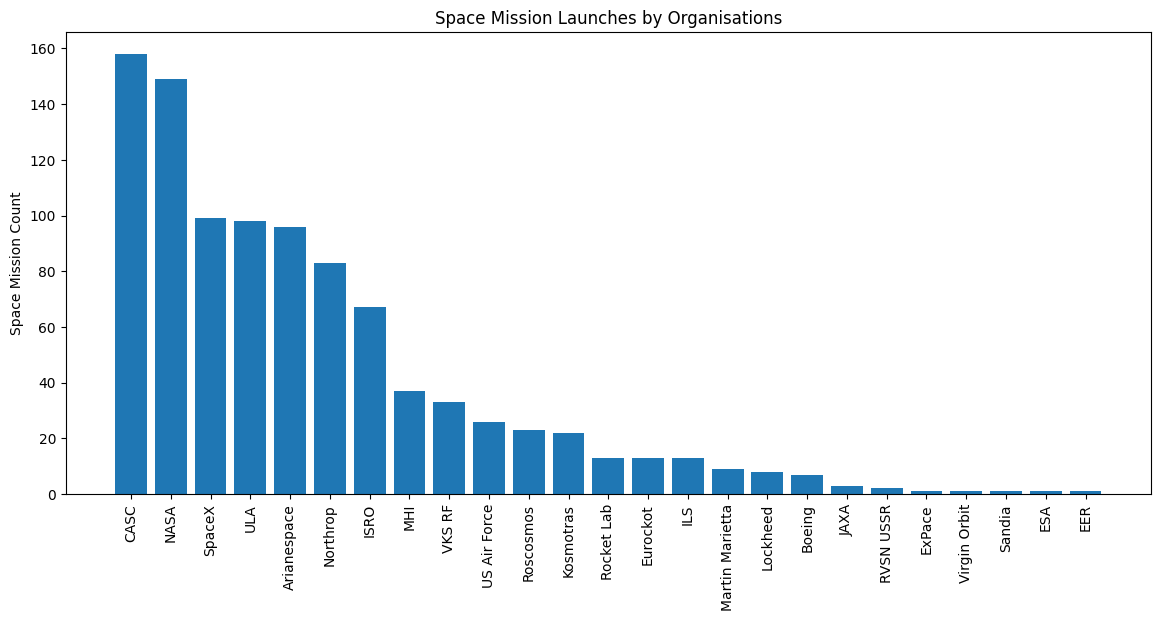

In [ ]:
plt.figure(figsize=(14, 6))
plt.bar(mission_by_org['Organization'], mission_by_org['Space Mission Count'])
plt.xticks(rotation=90)
plt.title("Space Mission Launches by Organisations")
plt.ylabel("Space Mission Count")
plt.show()

# Number of Active versus Retired Rockets

How many rockets are active compared to those that are decomissioned?

In [ ]:
rocket_status = df_data["Rocket_Status"].value_counts().reset_index()
rocket_status.columns = ['Rocket_Status', 'Count']
print(rocket_status)

   Rocket_Status  Count
0   StatusActive    586
1  StatusRetired    378


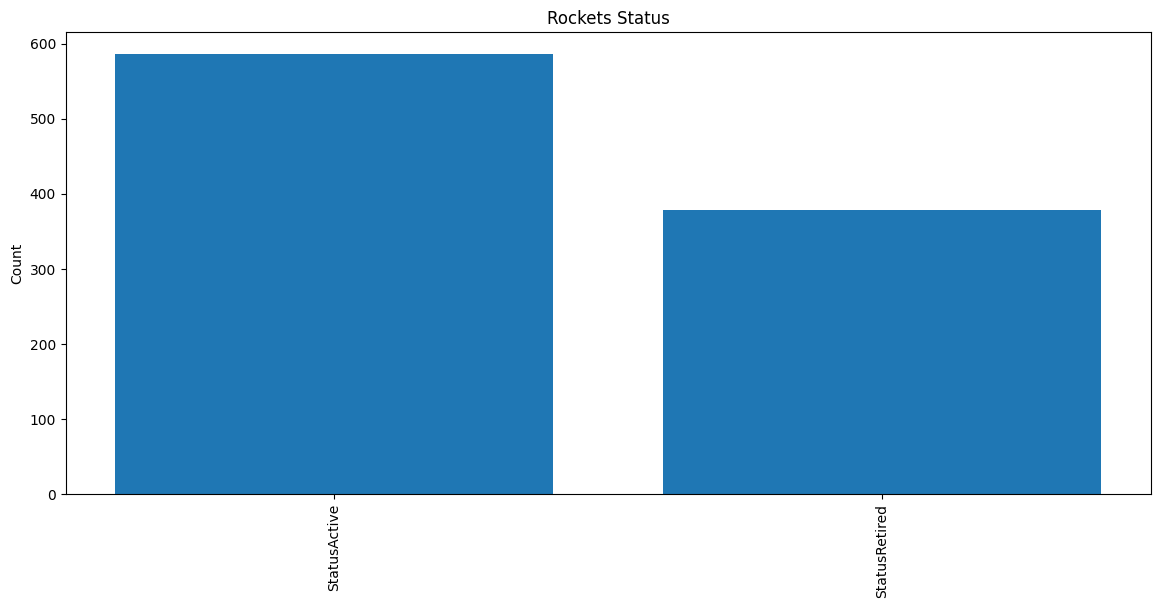

In [ ]:
plt.figure(figsize=(14, 6))
plt.bar(rocket_status['Rocket_Status'], rocket_status['Count'])
plt.xticks(rotation=90)
plt.title("Rockets Status")
plt.ylabel("Count")
plt.show()

# Distribution of Mission Status

How many missions were successful?
How many missions failed?

In [ ]:
mission_status = df_data["Mission_Status"].value_counts().reset_index()
mission_status.columns = ['Mission_Status', 'Count']
print(mission_status)

      Mission_Status  Count
0            Success    910
1            Failure     36
2    Partial Failure     17
3  Prelaunch Failure      1


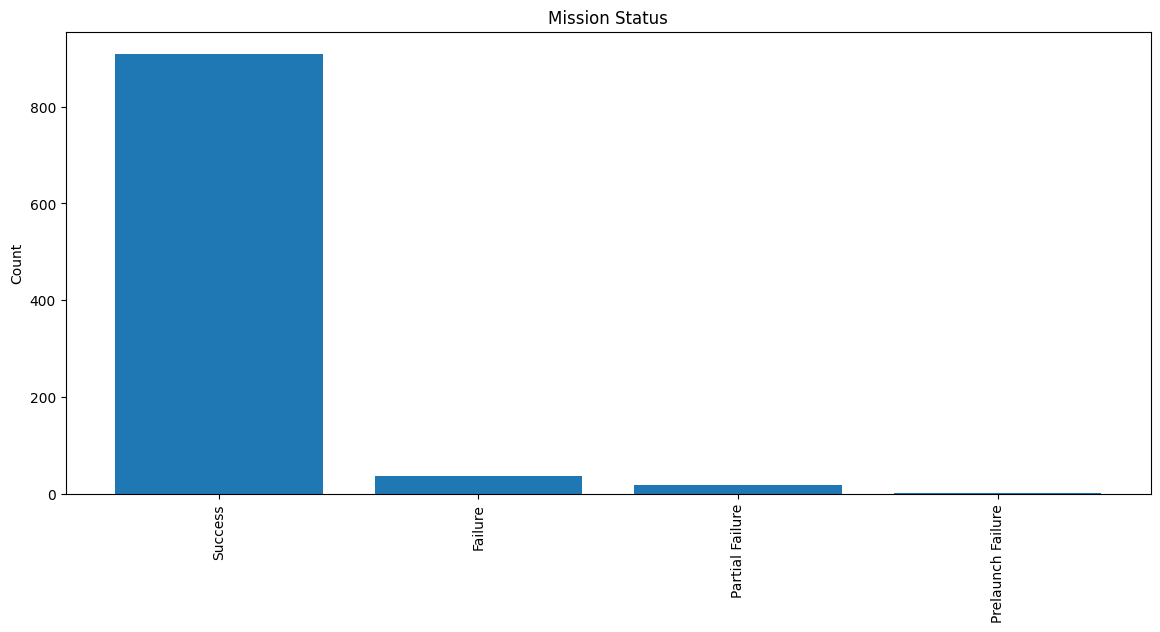

In [ ]:
plt.figure(figsize=(14, 6))
plt.bar(mission_status['Mission_Status'], mission_status['Count'])
plt.xticks(rotation=90)
plt.title("Mission Status")
plt.ylabel("Count")
plt.show()

# How Expensive are the Launches?

Create a histogram and visualise the distribution. The price column is given in USD millions (careful of missing values).

In [ ]:
print(df_data['Price'].isnull())


0       False
1       False
3       False
4       False
5       False
        ...  
3855    False
3971    False
3993    False
4000    False
4020    False
Name: Price, Length: 964, dtype: bool


In [ ]:
df_data = df_data.dropna(subset=['Price'])
# Convert to numbers just in case
df_data['Price'] = pd.to_numeric(df_data['Price'], errors='coerce')

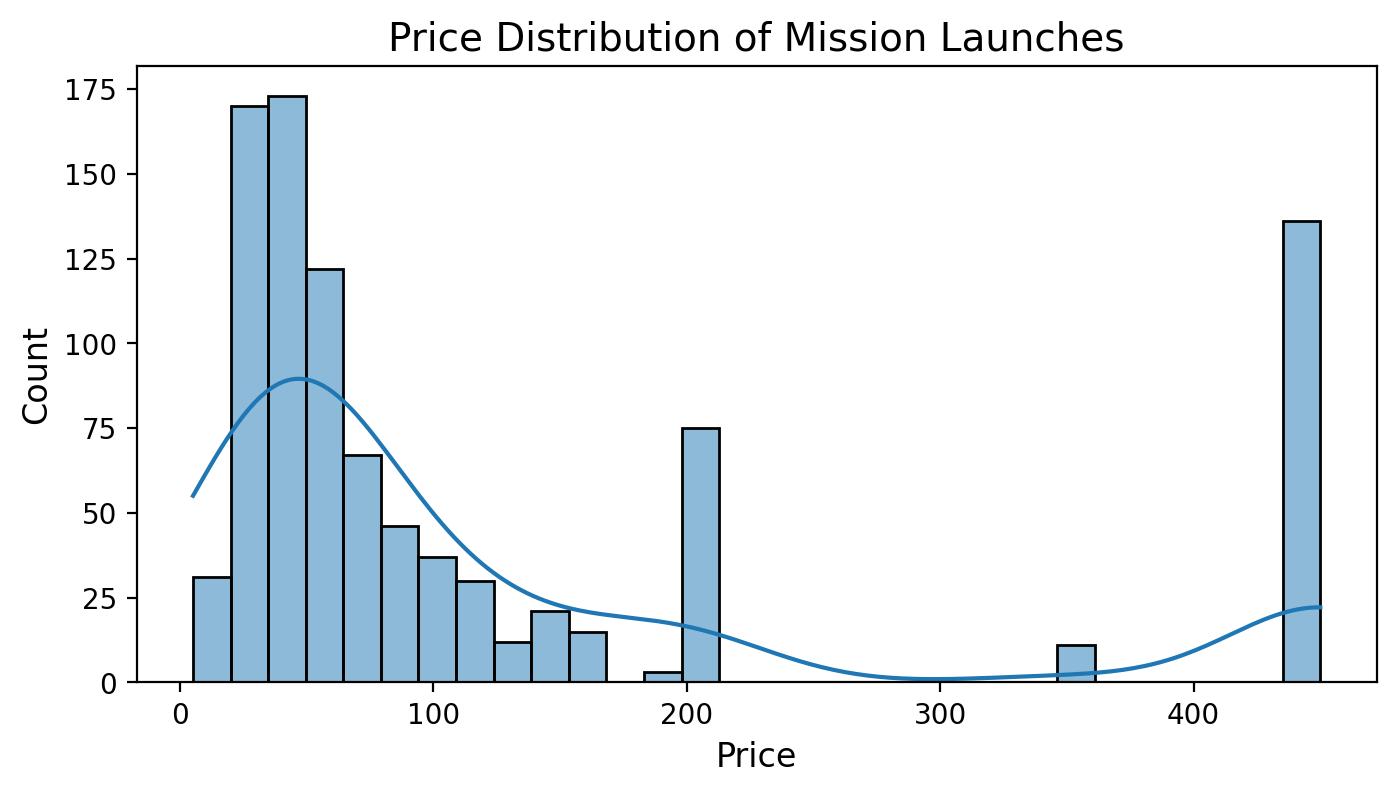

In [ ]:
plt.figure(figsize=(8,4), dpi=200)
sns.histplot(data=df_data, x='Price', bins=30, kde=True)
plt.title('Price Distribution of Mission Launches', fontsize=14)
plt.xlabel('Price', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

# Use a Choropleth Map to Show the Number of Launches by Country

* Create a choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/)
* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map.
* You'll need to extract a `country` feature as well as change the country names that no longer exist.

Wrangle the Country Names

You'll need to use a 3 letter country code for each country. You might have to change some country names.

* Russia is the Russian Federation
* New Mexico should be USA
* Yellow Sea refers to China
* Shahrud Missile Test Site should be Iran
* Pacific Missile Range Facility should be USA
* Barents Sea should be Russian Federation
* Gran Canaria should be USA


You can use the iso3166 package to convert the country names to Alpha3 format.

In [ ]:
df_data["Country"] = df_data['Location'].apply(lambda x: x.split(",")[-1].strip())
print(df_data)

      Unnamed: 0.1  Unnamed: 0  Organisation  \
0                0           0        SpaceX   
1                1           1          CASC   
3                3           3     Roscosmos   
4                4           4           ULA   
5                5           5          CASC   
...            ...         ...           ...   
3855          3855        3855  US Air Force   
3971          3971        3971  US Air Force   
3993          3993        3993  US Air Force   
4000          4000        4000  US Air Force   
4020          4020        4020  US Air Force   

                                               Location  \
0            LC-39A, Kennedy Space Center, Florida, USA   
1     Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...   
3          Site 200/39, Baikonur Cosmodrome, Kazakhstan   
4              SLC-41, Cape Canaveral AFS, Florida, USA   
5          LC-9, Taiyuan Satellite Launch Center, China   
...                                                 ...   
3855      

In [ ]:
country_corrections = {"Russia": "Russian Federation",
    "New Mexico": "USA",
    "Yellow Sea": "China",
    "Shahrud Missile Test Site": "Iran",
    "Pacific Missile Range Facility": "USA",
    "Barents Sea": "Russian Federation",
    "Gran Canaria": "USA",
    "Kazakhstan": "Kazakhstan",
    "USA": "United States of America",
    "United States": "United States of America",}

df_data['Country'] = df_data['Country'].replace(country_corrections)
print(df_data)

      Unnamed: 0.1  Unnamed: 0  Organisation  \
0                0           0        SpaceX   
1                1           1          CASC   
3                3           3     Roscosmos   
4                4           4           ULA   
5                5           5          CASC   
...            ...         ...           ...   
3855          3855        3855  US Air Force   
3971          3971        3971  US Air Force   
3993          3993        3993  US Air Force   
4000          4000        4000  US Air Force   
4020          4020        4020  US Air Force   

                                               Location  \
0            LC-39A, Kennedy Space Center, Florida, USA   
1     Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...   
3          Site 200/39, Baikonur Cosmodrome, Kazakhstan   
4              SLC-41, Cape Canaveral AFS, Florida, USA   
5          LC-9, Taiyuan Satellite Launch Center, China   
...                                                 ...   
3855      

In [ ]:
def get_alpha3(name):
  try:
    return countries.get(name).alpha3
  except:
    return None

df_data["ISO"] = df_data['Country'].apply(get_alpha3)

df_data[['Location', 'Country', 'ISO']].head(10)

,Location,Country,ISO
0,"LC-39A, Kennedy Space Center, Florida, USA",United States of America,USA
1,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",China,CHN
3,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",Kazakhstan,KAZ
4,"SLC-41, Cape Canaveral AFS, Florida, USA",United States of America,USA
5,"LC-9, Taiyuan Satellite Launch Center, China",China,CHN
6,"Site 31/6, Baikonur Cosmodrome, Kazakhstan",Kazakhstan,KAZ
8,"SLC-40, Cape Canaveral AFS, Florida, USA",United States of America,USA
9,"LA-Y1, Tanegashima Space Center, Japan",Japan,JPN
10,"LP-0B, Wallops Flight Facility, Virginia, USA",United States of America,USA
11,"Site 95, Jiuquan Satellite Launch Center, China",China,CHN


In [ ]:
country_counts = df_data.groupby(["Country", "ISO"]).size().reset_index(name="Launch_Count")
print(country_counts)

fig = px.choropleth(
    country_counts,
    locations="ISO",
    color="Launch_Count",
    hover_name="Country",
    color_continuous_scale="matter",
    title="Number of Space Launches by Country"
)

fig.show()

                    Country  ISO  Launch_Count
0                     China  CHN           159
1                    France  FRA            95
2                     India  IND            67
3                     Japan  JPN            40
4                Kazakhstan  KAZ            46
5               New Zealand  NZL            13
6        Russian Federation  RUS            54
7                       USA  USA             3
8  United States of America  USA           487


# Use a Choropleth Map to Show the Number of Failures by Country


In [ ]:
failures = df_data[df_data["Mission_Status"] == "Failure"]
print(failures)

      Unnamed: 0.1  Unnamed: 0     Organisation  \
11              11          11           ExPace   
15              15          15       Rocket Lab   
27              27          27     Virgin Orbit   
36              36          36             CASC   
124            124         124      Arianespace   
137            137         137             CASC   
324            324         324             ISRO   
353            353         353       Rocket Lab   
414            414         414             CASC   
481            481         481           Sandia   
499            499         499           SpaceX   
534            534         534         Northrop   
601            601         601           VKS RF   
694            694         694         Northrop   
703            703         703             ISRO   
731            731         731             ISRO   
782            782         782         Northrop   
808            808         808           SpaceX   
879            879         879 

In [ ]:
failures_by_country = (failures.groupby(["Country", "ISO"]).size().reset_index(name="Failure_Count"))
print(failures_by_country)

fig = px.choropleth(
    failures_by_country,
    locations="ISO",
    color="Failure_Count",
    hover_name="Country",
    color_continuous_scale="matter",
    title="Number of Failed Space Launches by Country"
)

fig.show()

                    Country  ISO  Failure_Count
0                     China  CHN              4
1                    France  FRA              2
2                     India  IND              5
3                Kazakhstan  KAZ              2
4               New Zealand  NZL              2
5        Russian Federation  RUS              1
6                       USA  USA              1
7  United States of America  USA             19


# Create a Plotly Sunburst Chart of the countries, organisations, and mission status.

In [ ]:
fig = px.sunburst(
    df_data,
    path=["Country", "Organisation", "Mission_Status"],
    title="Sunburst Chart: Country → Organisation → Mission Status",
)

fig.show()

# Analyse the Total Amount of Money Spent by Organisation on Space Missions

In [ ]:
df_price = df_data.dropna(subset=["Price"])
money_spent = df_price.groupby("Organisation")["Price"].sum().reset_index().sort_values(by="Price", ascending=False)
print(money_spent)

       Organisation     Price
14             NASA 61,200.00
0       Arianespace 16,345.00
20              ULA 14,798.00
2              CASC  6,340.26
19           SpaceX  5,444.00
15         Northrop  3,930.00
12              MHI  3,532.50
8              ISRO  2,177.00
21     US Air Force  1,550.92
22           VKS RF  1,548.90
7               ILS  1,320.00
1            Boeing  1,241.00
17        Roscosmos  1,187.50
13  Martin Marietta    721.40
10        Kosmotras    638.00
5          Eurockot    543.40
11         Lockheed    280.00
9              JAXA    168.00
16       Rocket Lab     97.50
4               ESA     37.00
6            ExPace     28.30
3               EER     20.00
18           Sandia     15.00
23     Virgin Orbit     12.00


In [ ]:
fig = px.bar(
    money_spent,
    x="Price",
    y="Organisation",
    orientation="h",
    color="Price",
    color_continuous_scale="matter",
    title="Total Amount of Money Spent by Organisation on Space Missions (in USD Millions)",
)

fig.show()

# Analyse the Amount of Money Spent by Organisation per Launch

In [ ]:
df_price = df_data.dropna(subset=["Price"])
money_spent_per_launch = df_price.groupby("Organisation")["Price"].mean().reset_index().sort_values(by="Price", ascending=False)
print(money_spent_per_launch)

       Organisation  Price
14             NASA 450.00
1            Boeing 177.29
0       Arianespace 170.26
20              ULA 151.00
7               ILS 101.54
12              MHI  95.47
13  Martin Marietta  80.16
21     US Air Force  59.65
9              JAXA  56.00
19           SpaceX  54.99
17        Roscosmos  51.63
15         Northrop  47.35
22           VKS RF  46.94
5          Eurockot  41.80
2              CASC  40.13
4               ESA  37.00
11         Lockheed  35.00
8              ISRO  32.49
10        Kosmotras  29.00
6            ExPace  28.30
3               EER  20.00
18           Sandia  15.00
23     Virgin Orbit  12.00
16       Rocket Lab   7.50


In [ ]:
fig = px.bar(
    money_spent_per_launch,
    x="Organisation",
    y="Price",
    color="Price",
    color_continuous_scale="matter",
    title="Average Amount Spent by Organisation per Launch (USD Millions)",
)

fig.show()

# Chart the Number of Launches per Year

In [ ]:
df_data['date'] = pd.to_datetime(df_data['Date'], errors='coerce')
df_data['year'] = df_data['date'].dt.year
df_data['year'] = df_data['year'].astype("Int64")

launches_per_year = df_data.groupby("year").size().reset_index(name="Launch_Count").sort_values(by="year")
print(launches_per_year)

    year  Launch_Count
0   1964             2
1   1965             2
2   1966             3
3   1967             7
4   1968            10
5   1969             8
6   1970             1
7   1971             2
8   1972             2
9   1973             1
10  1981             2
11  1982             4
12  1983             5
13  1984             6
14  1985            10
15  1986             3
16  1987             3
17  1988             5
18  1989             6
19  1990            11
20  1991             7
21  1992            12
22  1993            12
23  1994            16
24  1995            10
25  1996            14
26  1997            18
27  1998            18
28  1999            13
29  2000            16
30  2001            10
31  2002            16
32  2003            20
33  2004            17
34  2005            15
35  2006            27
36  2007            29
37  2008            28
38  2009            31
39  2010            29
40  2011            29
41  2012            24
42  2013   

In [ ]:
fig = px.line(
    launches_per_year,
    x="year",
    y="Launch_Count",
    title="Number of Space Launches per Year",
)

fig.update_layout(
    xaxis_title="Year",
    yaxis_title="Number of Launches",
)

fig.show()

# Chart the Number of Launches Month-on-Month until the Present

Which month has seen the highest number of launches in all time? Superimpose a rolling average on the month on month time series chart.

In [10]:
df_data['date'] = pd.to_datetime(df_data['Date'], errors='coerce')
df_data['month'] = df_data['date'].dt.month
df_data['month'] = df_data['month'].astype("Int64")

launches_per_month = df_data.groupby("month").size().reset_index(name="Launch_Count").sort_values(by="month")
print(launches_per_month)

    month  Launch_Count
0       1           265
1       2           323
2       3           349
3       4           366
4       5           320
5       6           386
6       7           347
7       8           358
8       9           354
9      10           375
10     11           325
11     12           430


In [15]:
# Convert month numbers to datetime objects (use dummy year 2025 for clarity)
launches_per_month['month_date'] = launches_per_month['month'].apply(lambda m: datetime(2025, int(m), 1))
print(launches_per_month)

launches_per_month['Rolling_Avg'] = launches_per_month['Launch_Count'].rolling(window=2, min_periods=1).mean()
print(launches_per_month)

    month  Launch_Count  Rolling_Avg month_date
0       1           265          NaN 2025-01-01
1       2           323       312.33 2025-02-01
2       3           349       346.00 2025-03-01
3       4           366       345.00 2025-04-01
4       5           320       357.33 2025-05-01
5       6           386       351.00 2025-06-01
6       7           347       363.67 2025-07-01
7       8           358       353.00 2025-08-01
8       9           354       362.33 2025-09-01
9      10           375       351.33 2025-10-01
10     11           325       376.67 2025-11-01
11     12           430          NaN 2025-12-01
    month  Launch_Count  Rolling_Avg month_date
0       1           265       265.00 2025-01-01
1       2           323       294.00 2025-02-01
2       3           349       336.00 2025-03-01
3       4           366       357.50 2025-04-01
4       5           320       343.00 2025-05-01
5       6           386       353.00 2025-06-01
6       7           347       366.50 202

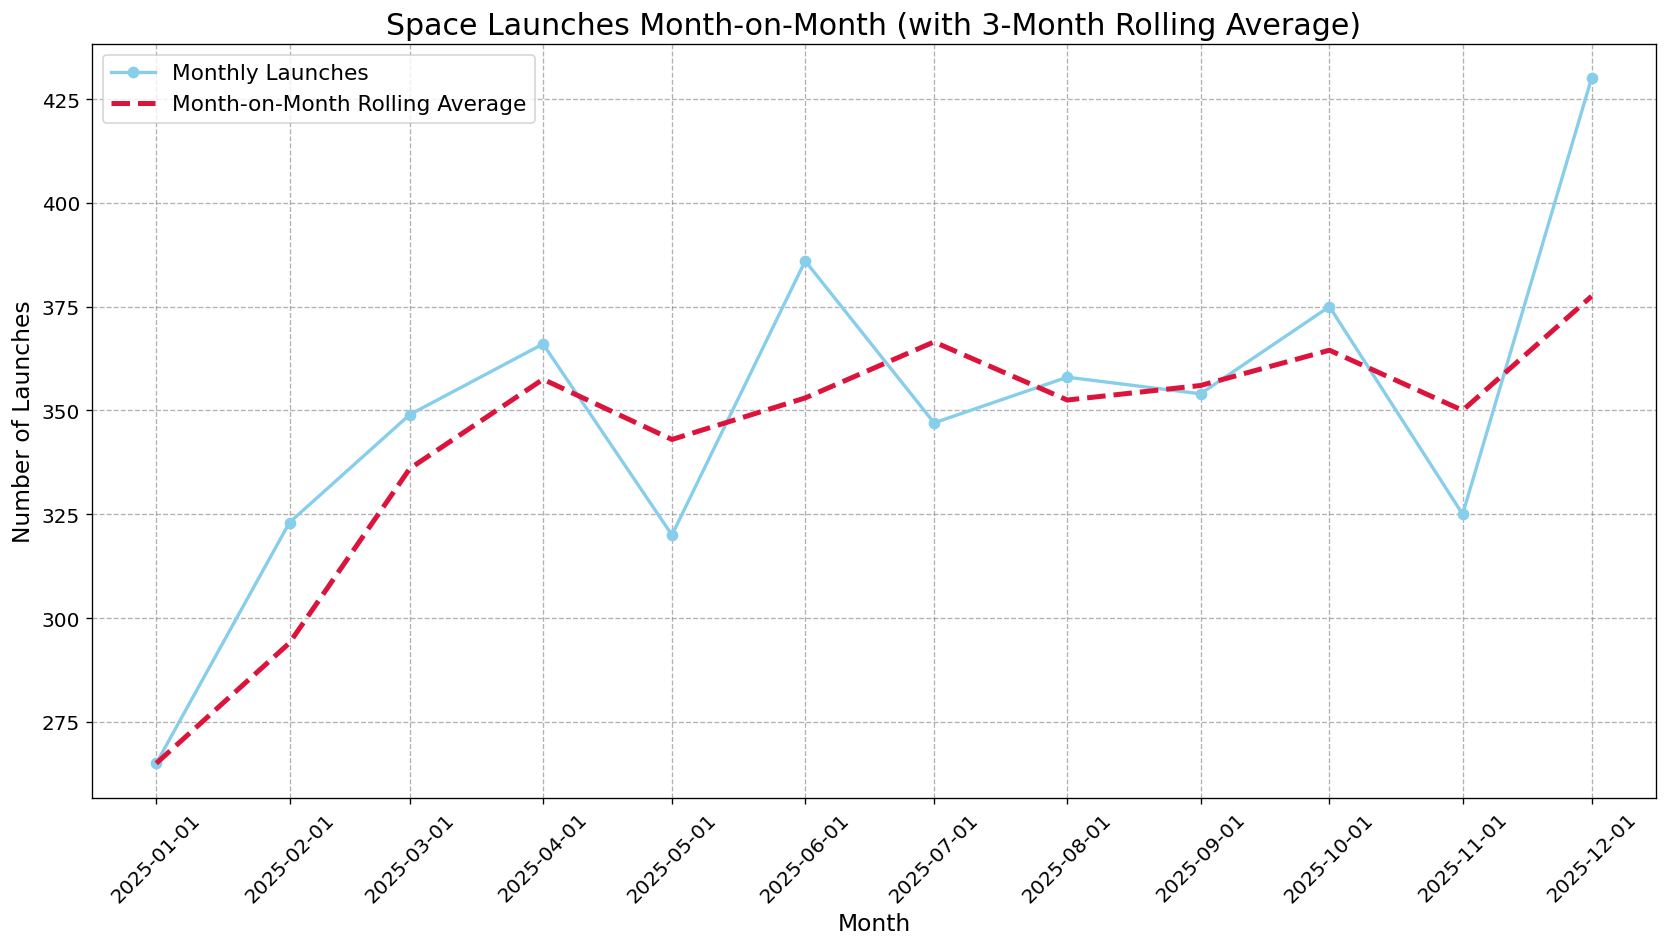

In [20]:
plt.figure(figsize=(14, 8), dpi=120)
plt.title("Space Launches Month-on-Month (with 3-Month Rolling Average)", fontsize=18)

# Axis formatting
ax = plt.gca()

# --- Add small timedelta padding to x-axis ---
start_date = launches_per_month['month_date'].min() - timedelta(days=15)
end_date = launches_per_month['month_date'].max() + timedelta(days=15)
ax.set_xlim([start_date, end_date])

# --- Plot actual monthly launches ---
plt.plot(
    launches_per_month['month_date'],
    launches_per_month['Launch_Count'],
    color='skyblue',
    linewidth=2,
    marker='o',
    label='Monthly Launches'
)

# --- Plot rolling average ---
plt.plot(
    launches_per_month['month_date'],
    launches_per_month['Rolling_Avg'],
    color='crimson',
    linewidth=3,
    linestyle='--',
    label='Month-on-Month Rolling Average'
)

# Beautify
plt.xlabel("Month", fontsize=14)
plt.ylabel("Number of Launches", fontsize=14)
plt.xticks(launches_per_month['month_date'], rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(color='grey', linestyle='--', alpha=0.6)
plt.legend(fontsize=13)
plt.tight_layout()

plt.show()


# Launches per Month: Which months are most popular and least popular for launches?

Some months have better weather than others. Which time of year seems to be best for space missions?

    month  Launch_Count  Rolling_Avg month_date Month_Name
0       1           265       265.00 2025-01-01        Jan
1       2           323       294.00 2025-02-01        Feb
2       3           349       336.00 2025-03-01        Mar
3       4           366       357.50 2025-04-01        Apr
4       5           320       343.00 2025-05-01        May
5       6           386       353.00 2025-06-01        Jun
6       7           347       366.50 2025-07-01        Jul
7       8           358       352.50 2025-08-01        Aug
8       9           354       356.00 2025-09-01        Sep
9      10           375       364.50 2025-10-01        Oct
10     11           325       350.00 2025-11-01        Nov
11     12           430       377.50 2025-12-01        Dec


/tmp/ipython-input-3286402367.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipython-input-3286402367.py:12: UserWarning:

Glyph 128640 (\N{ROCKET}) missing from font(s) DejaVu Sans.

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128640 (\N{ROCKET}) missing from font(s) DejaVu Sans.



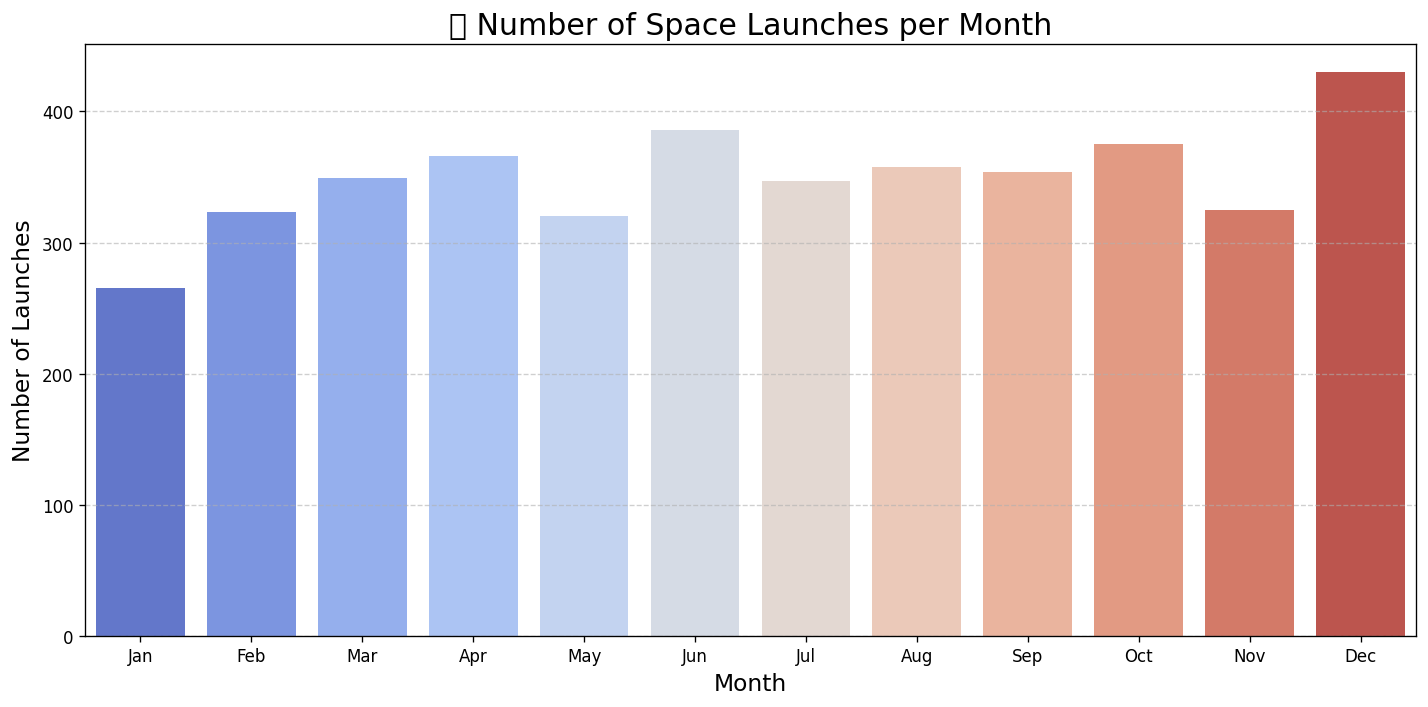

In [23]:
# Convert month numbers to names for readability
launches_per_month['Month_Name'] = launches_per_month['month'].apply(lambda x: datetime(2025, x, 1).strftime('%b'))
print(launches_per_month)

plt.figure(figsize=(12,6), dpi=120)
sns.barplot(data=launches_per_month, x='Month_Name', y='Launch_Count', palette='coolwarm')

plt.title("🚀 Number of Space Launches per Month", fontsize=18)
plt.xlabel("Month", fontsize=14)
plt.ylabel("Number of Launches", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# How has the Launch Price varied Over Time?

Create a line chart that shows the average price of rocket launches over time.

In [29]:
# Ensure date column is parsed properly
df_data['date'] = pd.to_datetime(df_data['Date'], errors='coerce')

# Extract year
df_data['year'] = df_data['date'].dt.year
df_data['year'] = df_data['year'].astype("Int64")

# Clean 'Price' column (remove commas or non-numeric values)
df_data['Price'] = (df_data['Price'].replace('[\$,]', '', regex=True).astype(float))

# Group by year and calculate average launch price
price_over_time = (df_data.groupby('year')['Price'].mean().reset_index(name='Average_Price').dropna())
print(price_over_time)

<>:9: SyntaxWarning:

invalid escape sequence '\$'

<>:9: SyntaxWarning:

invalid escape sequence '\$'

/tmp/ipython-input-2661223749.py:9: SyntaxWarning:

invalid escape sequence '\$'



    year  Average_Price
7   1964          63.23
8   1965          63.23
9   1966          59.00
10  1967         216.29
11  1968         279.20
12  1969         609.50
13  1970       1,160.00
14  1971       1,160.00
15  1972       1,160.00
16  1973       1,160.00
24  1981         450.00
25  1982         345.20
26  1983         366.16
27  1984         380.13
28  1985         408.08
29  1986         310.27
30  1987       1,687.20
31  1988       1,193.16
32  1989         380.83
33  1990         289.15
34  1991         391.43
35  1992         319.35
36  1993         276.73
37  1994         221.51
38  1995         325.00
39  1996         243.20
40  1997         221.74
41  1998         152.12
42  1999         136.17
43  2000         173.12
44  2001         290.70
45  2002         195.37
46  2003          80.51
47  2004          92.74
48  2005          95.79
49  2006         138.61
50  2007         125.70
51  2008         129.75
52  2009         180.29
53  2010         148.40
54  2011        

/tmp/ipython-input-1996587464.py:16: UserWarning:

Glyph 128640 (\N{ROCKET}) missing from font(s) DejaVu Sans.

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128640 (\N{ROCKET}) missing from font(s) DejaVu Sans.



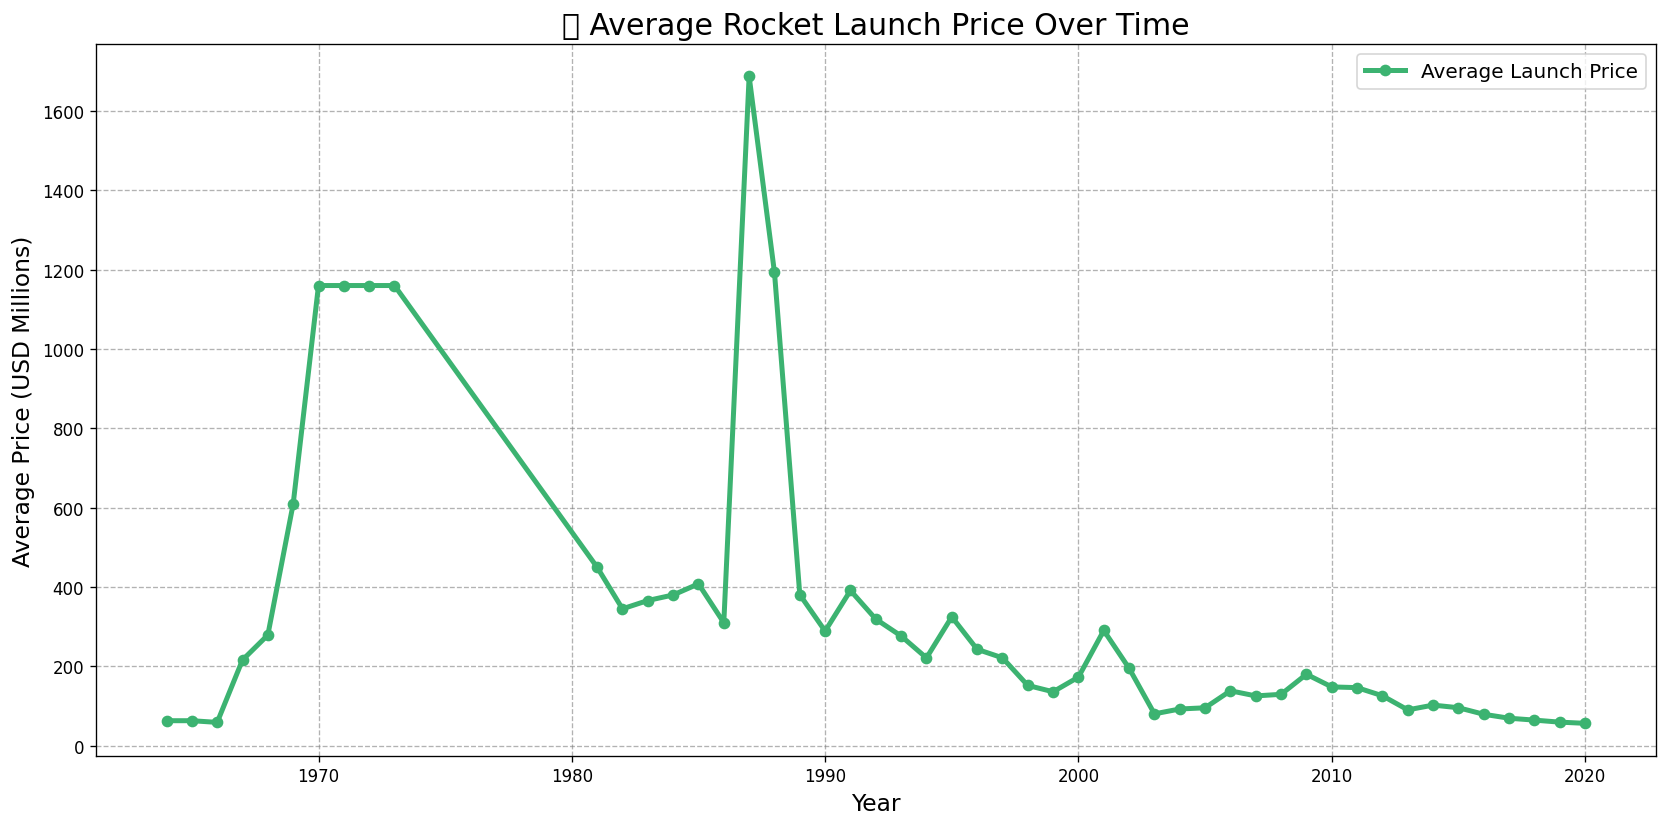

In [31]:
plt.figure(figsize=(14, 7), dpi=120)
plt.plot(
    price_over_time['year'],
    price_over_time['Average_Price'],
    color='mediumseagreen',
    linewidth=3,
    marker='o',
    label='Average Launch Price'
)

plt.title("Average Rocket Launch Price Over Time", fontsize=18)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Average Price (USD Millions)", fontsize=14)
plt.grid(color='grey', linestyle='--', alpha=0.6)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

# Chart the Number of Launches over Time by the Top 10 Organisations.

How has the dominance of launches changed over time between the different players?

In [46]:
top_10_orgs = df_data['Organisation'].value_counts().head(10).index
print(top_10_orgs)

Index(['RVSN USSR', 'Arianespace', 'General Dynamics', 'CASC', 'NASA',
       'VKS RF', 'US Air Force', 'ULA', 'Boeing', 'Martin Marietta'],
      dtype='object', name='Organisation')


In [47]:
top_org_data = df_data[df_data['Organisation'].isin(top_10_orgs)]
print(top_org_data)

launches_by_org = top_org_data.groupby(['year', 'Organisation']).size().reset_index(name='Launch_Count')
print(launches_by_org)

      Unnamed: 0.1  Unnamed: 0  Organisation  \
1                1           1          CASC   
4                4           4           ULA   
5                5           5          CASC   
7                7           7          CASC   
12              12          12          CASC   
...            ...         ...           ...   
4307          4307        4307  US Air Force   
4313          4313        4313     RVSN USSR   
4315          4315        4315     RVSN USSR   
4322          4322        4322     RVSN USSR   
4323          4323        4323     RVSN USSR   

                                               Location  \
1     Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...   
4              SLC-41, Cape Canaveral AFS, Florida, USA   
5          LC-9, Taiyuan Satellite Launch Center, China   
7       LC-101, Wenchang Satellite Launch Center, China   
12         LC-3, Xichang Satellite Launch Center, China   
...                                                 ...   
4307      

In [48]:
launches_pivot = launches_by_org.pivot(index='year', columns='Organisation', values='Launch_Count').fillna(0)
print(launches_pivot)

Organisation  Arianespace  Boeing  CASC  General Dynamics  Martin Marietta  \
year                                                                         
1957                 0.00    0.00  0.00              0.00             0.00   
1958                 0.00    0.00  0.00              0.00             0.00   
1959                 0.00    0.00  0.00              1.00             0.00   
1960                 0.00    0.00  0.00              5.00             0.00   
1961                 0.00    0.00  0.00              8.00             0.00   
...                   ...     ...   ...               ...              ...   
2016                11.00    0.00 22.00              0.00             0.00   
2017                11.00    0.00 16.00              0.00             0.00   
2018                11.00    0.00 37.00              0.00             0.00   
2019                 9.00    0.00 27.00              0.00             0.00   
2020                 4.00    0.00 19.00              0.00       

/tmp/ipython-input-3236326352.py:16: UserWarning:

Glyph 128640 (\N{ROCKET}) missing from font(s) DejaVu Sans.

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128640 (\N{ROCKET}) missing from font(s) DejaVu Sans.



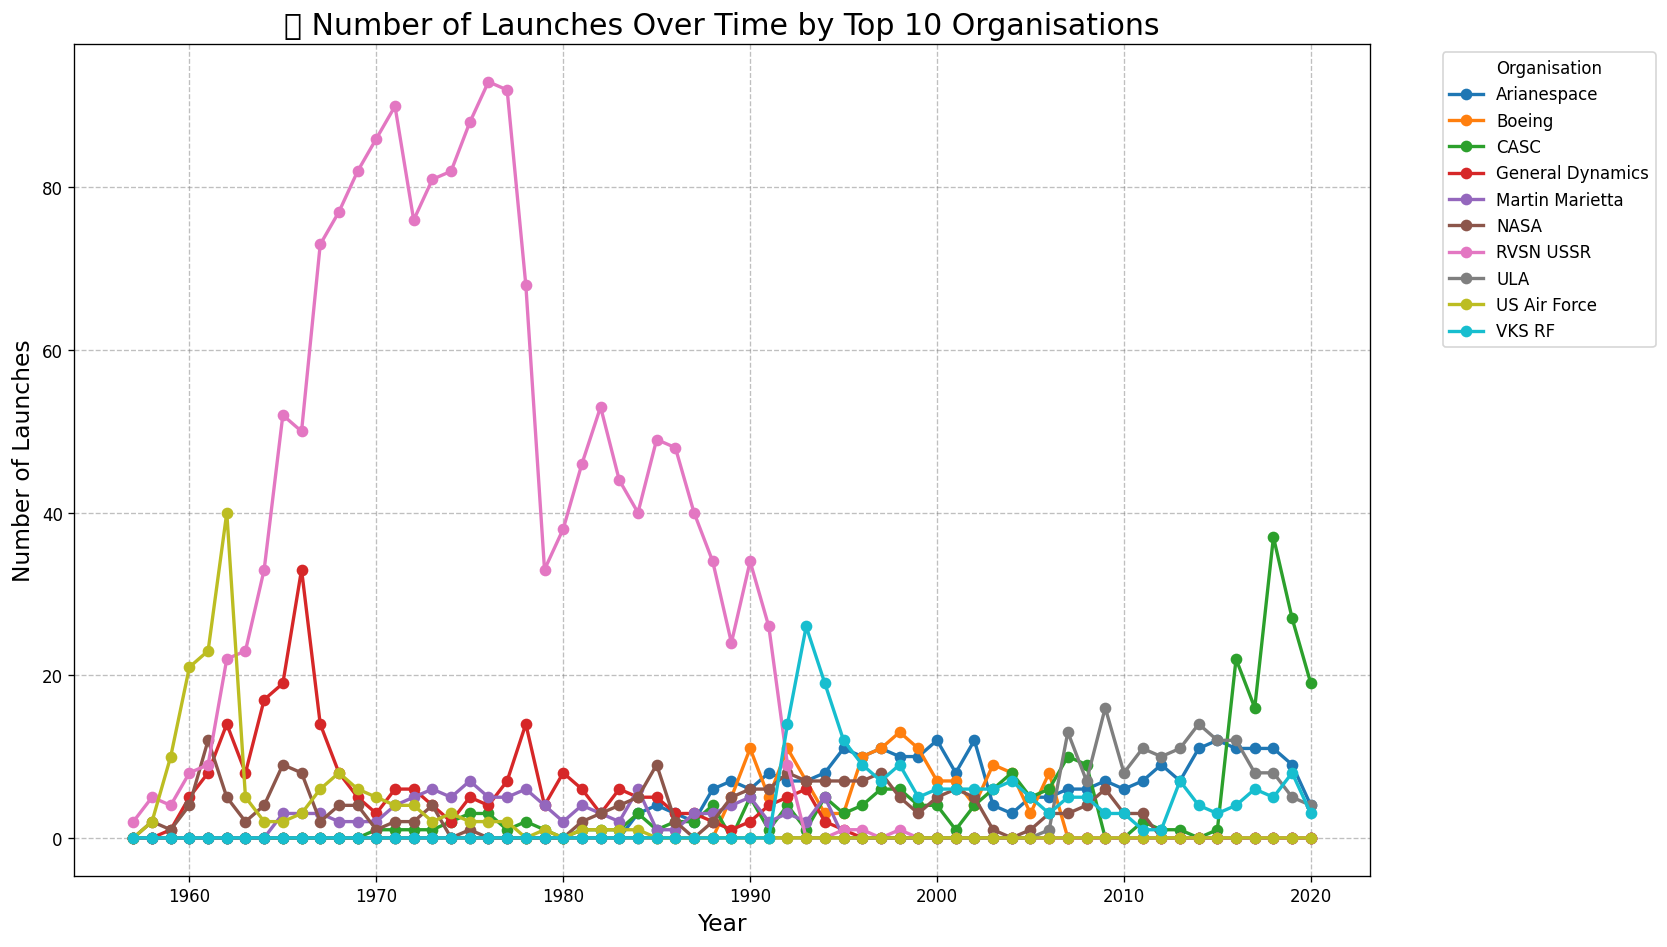

In [50]:
plt.figure(figsize=(14, 8), dpi=120)
for org in launches_pivot.columns:
    plt.plot(
        launches_pivot.index,
        launches_pivot[org],
        marker='o',
        linewidth=2,
        label=org
    )

plt.title("🚀 Number of Launches Over Time by Top 10 Organisations", fontsize=18)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Number of Launches", fontsize=14)
plt.grid(color='grey', linestyle='--', alpha=0.5)
plt.legend(title="Organisation", fontsize=10, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Cold War Space Race: USA vs USSR

The cold war lasted from the start of the dataset up until 1991.

In [51]:
cold_war_data = df_data[df_data['year'] <= 1991]
print(cold_war_data)

      Unnamed: 0.1  Unnamed: 0      Organisation  \
1717          1717        1717              CASC   
1719          1719        1719          Yuzhmash   
1720          1720        1720       Arianespace   
1721          1721        1721  General Dynamics   
1722          1722        1722  General Dynamics   
...            ...         ...               ...   
4319          4319        4319           US Navy   
4320          4320        4320              AMBA   
4321          4321        4321           US Navy   
4322          4322        4322         RVSN USSR   
4323          4323        4323         RVSN USSR   

                                               Location  \
1717       LC-3, Xichang Satellite Launch Center, China   
1719             Site 32/2, Plesetsk Cosmodrome, Russia   
1720  ELA-2, Guiana Space Centre, French Guiana, France   
1721          SLC-36B, Cape Canaveral AFS, Florida, USA   
1722            SLC-3W, Vandenberg AFB, California, USA   
...                  

In [54]:
cold_war_data['Country'] = cold_war_data['Location'].apply(lambda x: str(x).split(',')[-1].strip())

cold_war_data['Country'] = cold_war_data['Country'].replace({
    'USA': 'United States',
    'USSR': 'Soviet Union',
    'Russian Federation': 'Soviet Union'
})

# Keep only USA and USSR
cold_war_data = cold_war_data[cold_war_data['Country'].isin(['United States', 'Soviet Union'])]

launches_by_year = (cold_war_data.groupby(['year', 'Country']).size().reset_index(name='Launch_Count'))
print(launches_by_year)


    year        Country  Launch_Count
0   1957  United States             1
1   1958  United States            17
2   1959  United States            16
3   1960  United States            30
4   1961  United States            43
5   1962  United States            59
6   1963  United States            15
7   1964  United States            23
8   1965  United States            33
9   1966  United States            47
10  1967  United States            25
11  1968  United States            22
12  1969  United States            17
13  1970  United States            11
14  1971  United States            16
15  1972  United States            17
16  1973  United States            16
17  1974  United States            10
18  1975  United States            15
19  1976  United States            11
20  1977  United States            14
21  1978  United States            20
22  1979  United States             9
23  1980  United States            10
24  1981  United States            13
25  1982  Un

/tmp/ipython-input-2464605821.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipython-input-2464605821.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128640 (\N{ROCKET}) missing from font(s) DejaVu Sans.



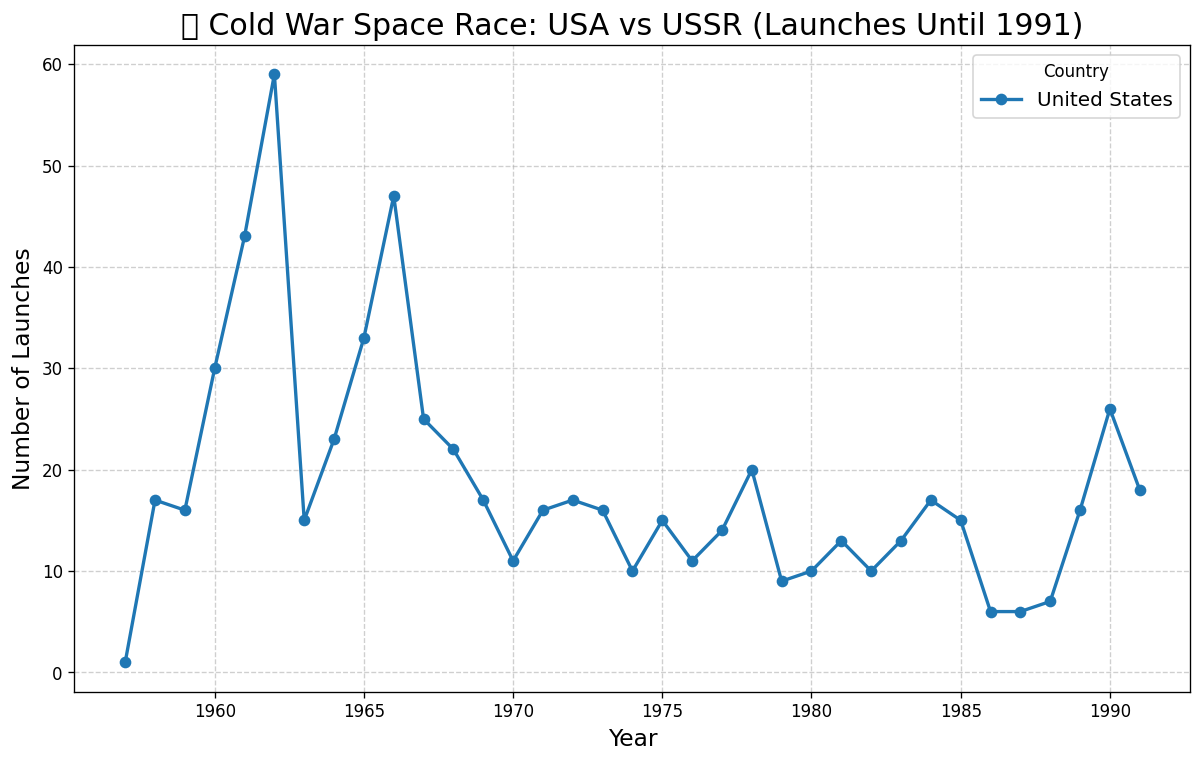

In [57]:
plt.figure(figsize=(12, 7), dpi=120)
for country in launches_by_year['Country'].unique():
    subset = launches_by_year[launches_by_year['Country'] == country]
    plt.plot(subset['date'], subset['Launch_Count'], marker='o', linewidth=2, label=country)

plt.title("🚀 Cold War Space Race: USA vs USSR (Launches Until 1991)", fontsize=18)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Number of Launches", fontsize=14)
plt.legend(title="Country", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

## Create a Plotly Pie Chart comparing the total number of launches of the USSR and the USA

Hint: Remember to include former Soviet Republics like Kazakhstan when analysing the total number of launches.

In [64]:
df_data['Country'] = df_data['Location'].apply(lambda x: str(x).split(',')[-1].strip())

df_data['Country'] = df_data['Country'].replace({
    'USA': 'United States',
    'USSR': 'Soviet Union',
    'Russian Federation': 'Soviet Union',
    'Kazakhstan': 'Soviet Union',  # ✅ Include former USSR states
    'Ukraine': 'Soviet Union',
    'Belarus': 'Soviet Union'
})

print(df_data)

cold_war_data = df_data[df_data['Country'].isin(['United States', 'Soviet Union'])]
print(cold_war_data)

launch_counts = (
    cold_war_data.groupby('Country')
    .size()
    .reset_index(name='Launch_Count')
)

print(launch_counts)


      Unnamed: 0.1  Unnamed: 0 Organisation  \
0                0           0       SpaceX   
1                1           1         CASC   
2                2           2       SpaceX   
3                3           3    Roscosmos   
4                4           4          ULA   
...            ...         ...          ...   
4319          4319        4319      US Navy   
4320          4320        4320         AMBA   
4321          4321        4321      US Navy   
4322          4322        4322    RVSN USSR   
4323          4323        4323    RVSN USSR   

                                               Location  \
0            LC-39A, Kennedy Space Center, Florida, USA   
1     Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...   
2                         Pad A, Boca Chica, Texas, USA   
3          Site 200/39, Baikonur Cosmodrome, Kazakhstan   
4              SLC-41, Cape Canaveral AFS, Florida, USA   
...                                                 ...   
4319           LC-18A,

In [63]:
fig = px.pie(
    launch_counts,
    names='Country',
    values='Launch_Count',
    title='Total Launches: USA vs USSR (Including Former Soviet Republics)',
    color='Country',
    color_discrete_map={'United States': 'blue', 'Soviet Union': 'red'}
)

fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

## Create a Chart that Shows the Total Number of Launches Year-On-Year by the Two Superpowers

In [69]:
df_data['Country'] = df_data['Location'].apply(lambda x: str(x).split(',')[-1].strip())

df_data['Country'] = df_data['Country'].replace({
    'USA': 'United States',
    'USSR': 'Soviet Union',
    'Russian Federation': 'Soviet Union',
    'Kazakhstan': 'Soviet Union',  # ✅ Include former USSR states
    'Ukraine': 'Soviet Union',
    'Belarus': 'Soviet Union'
})

print(df_data)

cold_war_data = df_data[df_data['Country'].isin(['United States', 'Soviet Union'])]
print(cold_war_data)

launches_per_year = (
    cold_war_data.groupby(['year', 'Country'])
    .size()
    .reset_index(name='Launch_Count')
)

print(launches_per_year)

      Unnamed: 0.1  Unnamed: 0 Organisation  \
0                0           0       SpaceX   
1                1           1         CASC   
2                2           2       SpaceX   
3                3           3    Roscosmos   
4                4           4          ULA   
...            ...         ...          ...   
4319          4319        4319      US Navy   
4320          4320        4320         AMBA   
4321          4321        4321      US Navy   
4322          4322        4322    RVSN USSR   
4323          4323        4323    RVSN USSR   

                                               Location  \
0            LC-39A, Kennedy Space Center, Florida, USA   
1     Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...   
2                         Pad A, Boca Chica, Texas, USA   
3          Site 200/39, Baikonur Cosmodrome, Kazakhstan   
4              SLC-41, Cape Canaveral AFS, Florida, USA   
...                                                 ...   
4319           LC-18A,

/tmp/ipython-input-82751329.py:16: UserWarning:

Glyph 128640 (\N{ROCKET}) missing from font(s) DejaVu Sans.

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128640 (\N{ROCKET}) missing from font(s) DejaVu Sans.



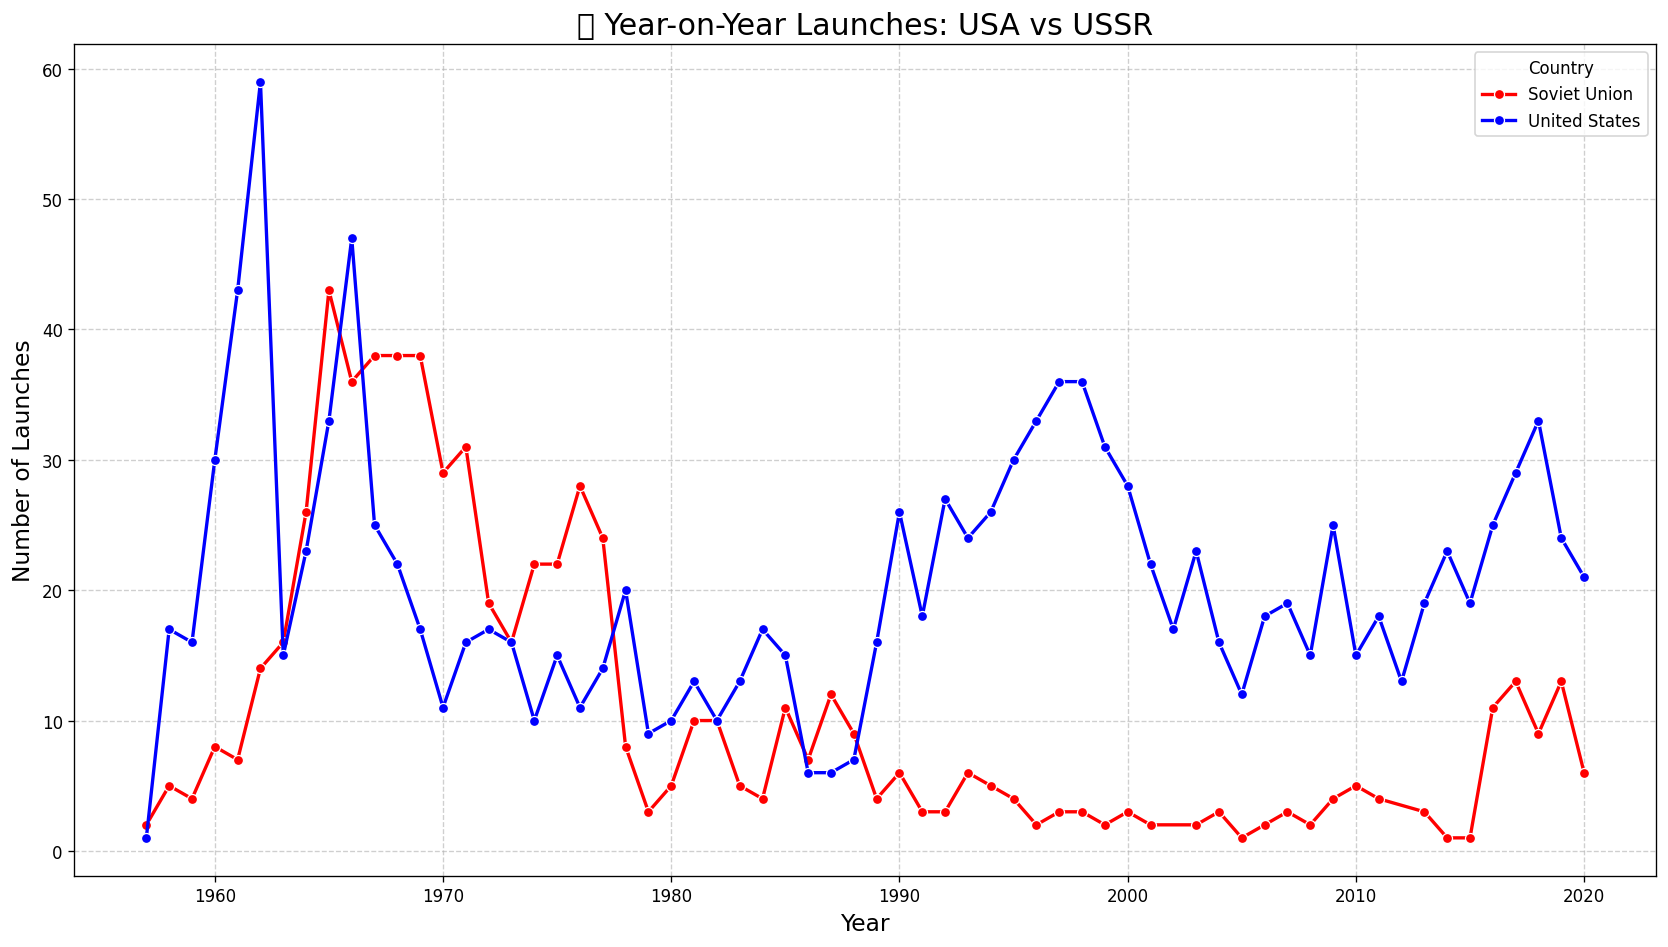

In [71]:
plt.figure(figsize=(14, 8), dpi=120)
sns.lineplot(
    data=launches_per_year,
    x='year',
    y='Launch_Count',
    hue='Country',
    palette={'United States': 'blue', 'Soviet Union': 'red'},
    marker='o',
    linewidth=2
)

plt.title("Year-on-Year Launches: USA vs USSR", fontsize=18)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Number of Launches", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

## Chart the Total Number of Mission Failures Year on Year.

In [74]:
failures = df_data[df_data['Mission_Status'].str.contains('Failure', case=False, na=False)]
print(failures)

failures_per_year = (
    failures.groupby('year')
    .size()
    .reset_index(name='Failure_Count')
)

print(failures_per_year.head())

      Unnamed: 0.1  Unnamed: 0  Organisation  \
11              11          11        ExPace   
15              15          15    Rocket Lab   
27              27          27  Virgin Orbit   
36              36          36          CASC   
43              43          43          CASC   
...            ...         ...           ...   
4314          4314        4314       US Navy   
4315          4315        4315     RVSN USSR   
4318          4318        4318          AMBA   
4319          4319        4319       US Navy   
4321          4321        4321       US Navy   

                                               Location  \
11      Site 95, Jiuquan Satellite Launch Center, China   
15      Rocket Lab LC-1A, M?hia Peninsula, New Zealand   
27    Cosmic Girl, Mojave Air and Space Port, Califo...   
36         LC-2, Xichang Satellite Launch Center, China   
43      LC-201, Wenchang Satellite Launch Center, China   
...                                                 ...   
4314      

/tmp/ipython-input-2467675342.py:14: UserWarning:

Glyph 128165 (\N{COLLISION SYMBOL}) missing from font(s) DejaVu Sans.

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128165 (\N{COLLISION SYMBOL}) missing from font(s) DejaVu Sans.



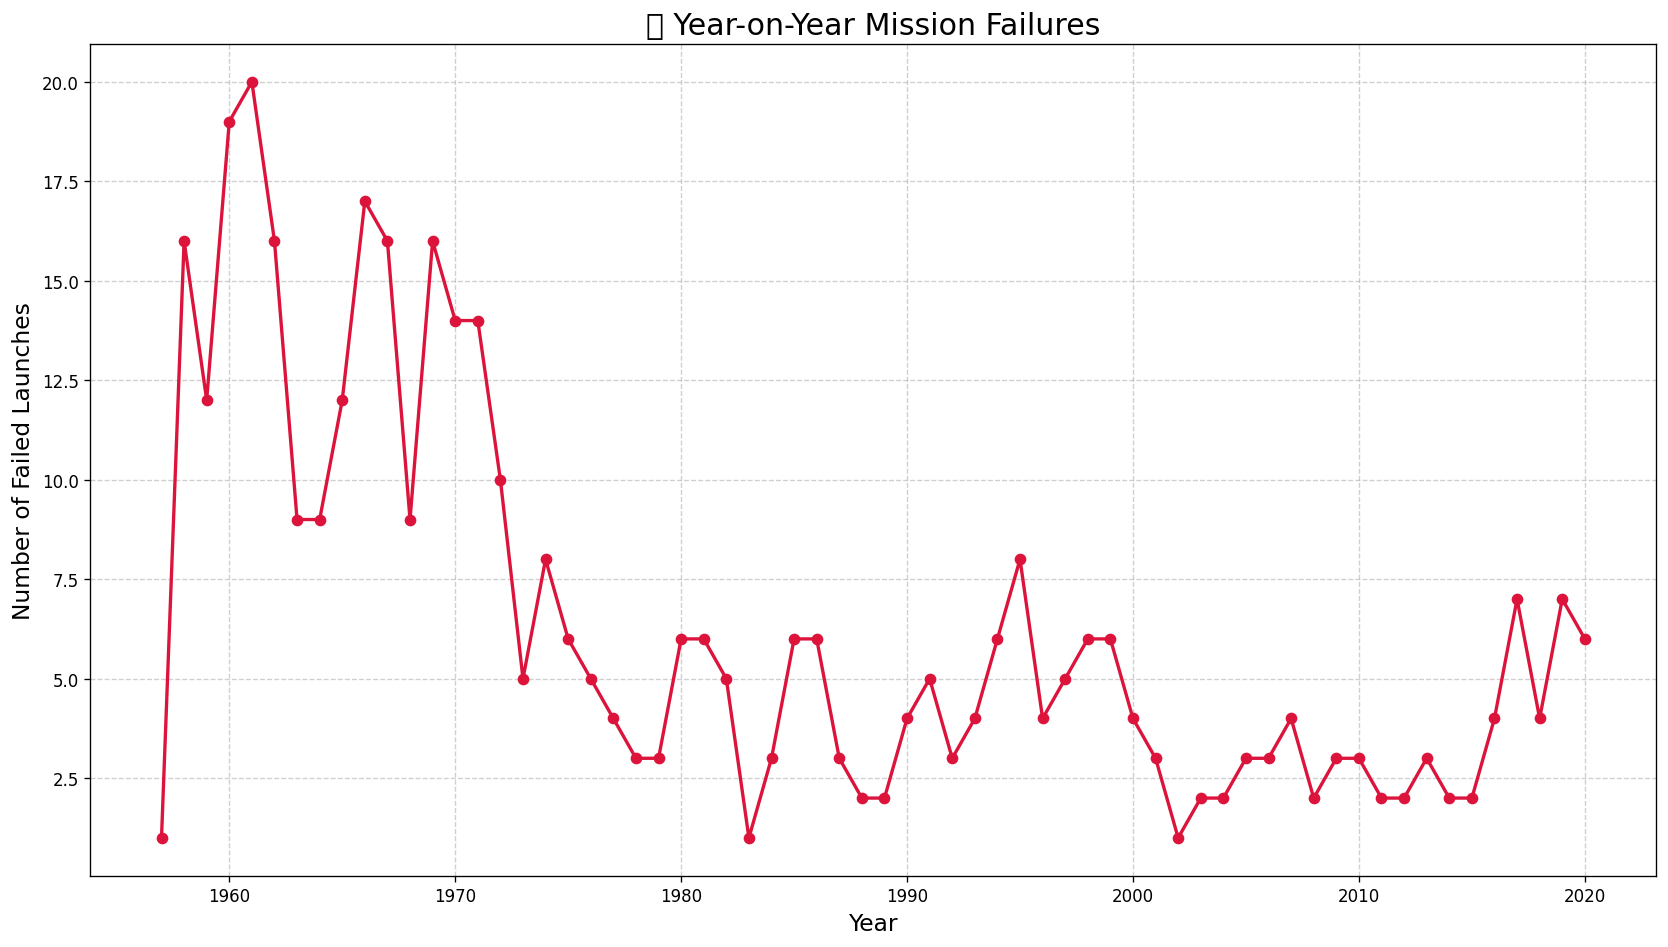

In [75]:
plt.figure(figsize=(14, 8), dpi=120)
plt.plot(
    failures_per_year['year'],
    failures_per_year['Failure_Count'],
    marker='o',
    color='crimson',
    linewidth=2
)

plt.title("💥 Year-on-Year Mission Failures", fontsize=18)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Number of Failed Launches", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

## Chart the Percentage of Failures over Time

Did failures go up or down over time? Did the countries get better at minimising risk and improving their chances of success over time?

In [76]:
total_launches = (
    df_data.groupby('year')
    .size()
    .reset_index(name='Total_Launches')
)
print(total_launches)

    year  Total_Launches
0   1957               3
1   1958              22
2   1959              20
3   1960              38
4   1961              52
..   ...             ...
59  2016              88
60  2017              90
61  2018             117
62  2019             107
63  2020              63

[64 rows x 2 columns]


In [80]:
failures = df_data[df_data['Mission_Status'].str.contains('Failure', case=False, na=False)]

failures_per_year = (
    failures.groupby('year')
    .size()
    .reset_index(name='Failures')
)

print(failures_per_year)

    year  Failures
0   1957         1
1   1958        16
2   1959        12
3   1960        19
4   1961        20
..   ...       ...
59  2016         4
60  2017         7
61  2018         4
62  2019         7
63  2020         6

[64 rows x 2 columns]


In [84]:
failure_rate = pd.merge(total_launches, failures_per_year, on='year', how='left')
failure_rate['Failures'] = failure_rate['Failures'].fillna(0)
failure_rate['Failure_Percentage'] = (failure_rate['Failures'] / failure_rate['Total_Launches']) * 100

print(failure_rate)

    year  Total_Launches  Failures  Failure_Percentage
0   1957               3         1               33.33
1   1958              22        16               72.73
2   1959              20        12               60.00
3   1960              38        19               50.00
4   1961              52        20               38.46
..   ...             ...       ...                 ...
59  2016              88         4                4.55
60  2017              90         7                7.78
61  2018             117         4                3.42
62  2019             107         7                6.54
63  2020              63         6                9.52

[64 rows x 4 columns]


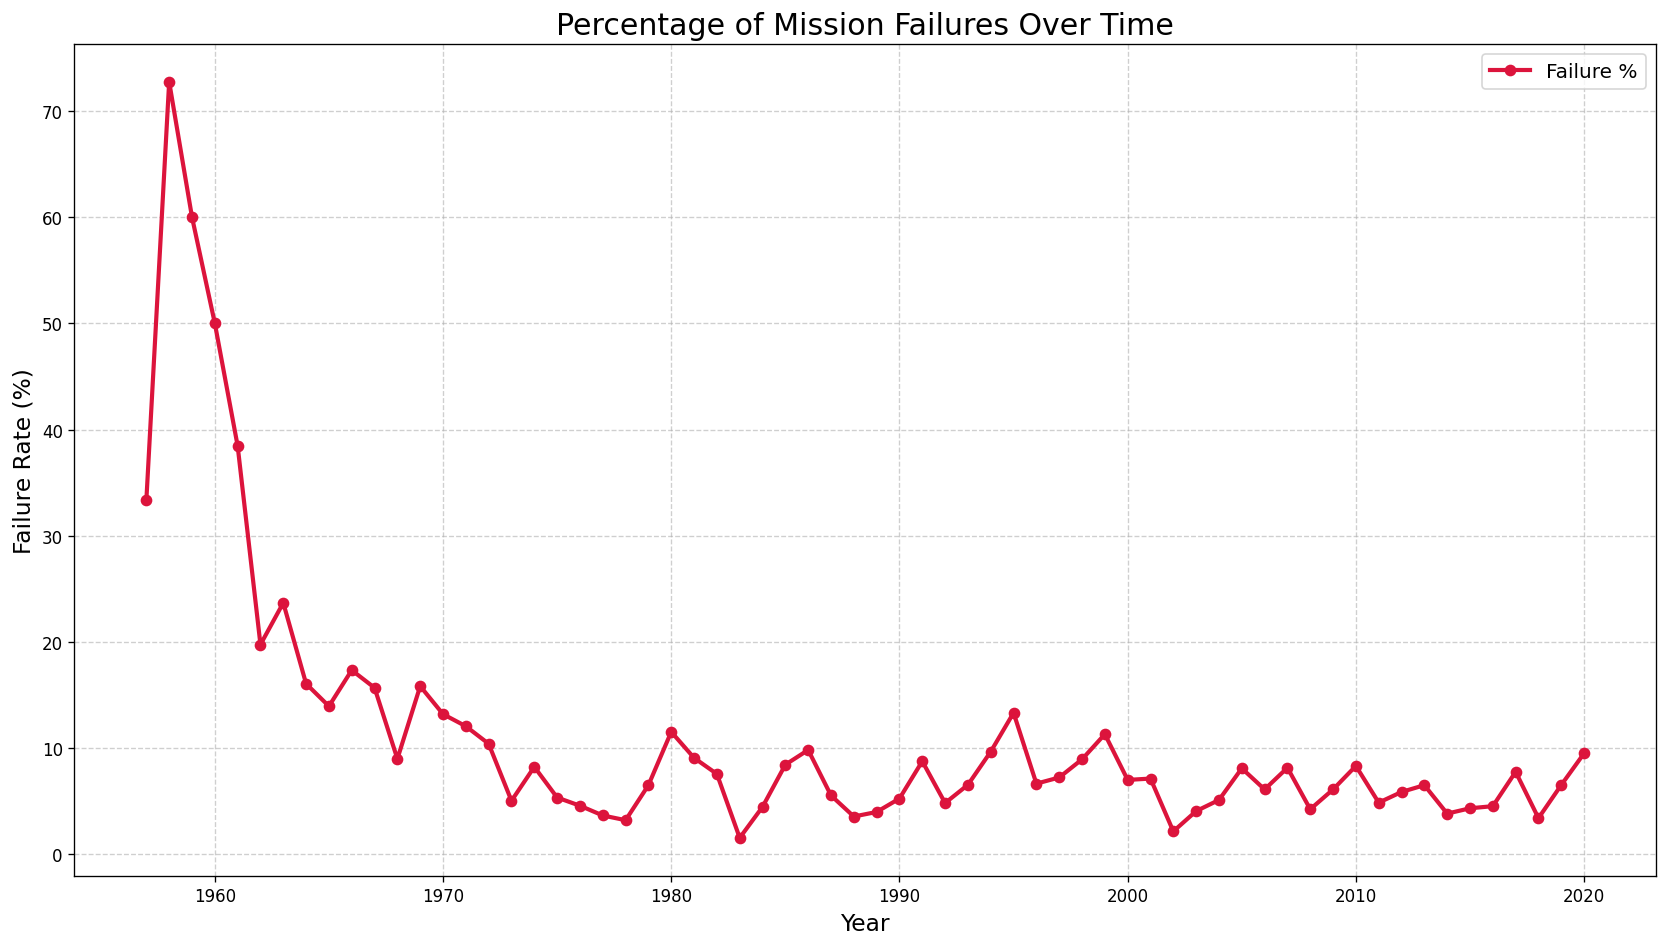

In [87]:
plt.figure(figsize=(14, 8), dpi=120)
plt.plot(
    failure_rate['year'],
    failure_rate['Failure_Percentage'],
    color='crimson',
    linewidth=2.5,
    marker='o',
    label='Failure %'
)

plt.title("Percentage of Mission Failures Over Time", fontsize=18)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Failure Rate (%)", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

# For Every Year Show which Country was in the Lead in terms of Total Number of Launches up to and including including 2020)

Do the results change if we only look at the number of successful launches?

In [92]:
launches_by_country = (
    df_data.groupby(['year', 'Country'])
    .size()
    .reset_index(name='Launch_Count')
)

print(launches_by_country)

leaders = (launches_by_country.loc[
    launches_by_country.groupby('year')['Launch_Count'].idxmax()]
           .sort_values('year')
          )
print(leaders)

leaders = leaders[leaders['year'] <= 2020]
print(leaders)



     year                    Country  Launch_Count
0    1957               Soviet Union             2
1    1957              United States             1
2    1958               Soviet Union             5
3    1958              United States            17
4    1959               Soviet Union             4
..    ...                        ...           ...
406  2020                New Zealand             3
407  2020                     Russia             3
408  2020  Shahrud Missile Test Site             1
409  2020               Soviet Union             6
410  2020              United States            21

[411 rows x 3 columns]
     year        Country  Launch_Count
0    1957   Soviet Union             2
3    1958  United States            17
5    1959  United States            16
7    1960  United States            30
10   1961  United States            43
..    ...            ...           ...
372  2016  United States            25
380  2017  United States            29
381  2018    

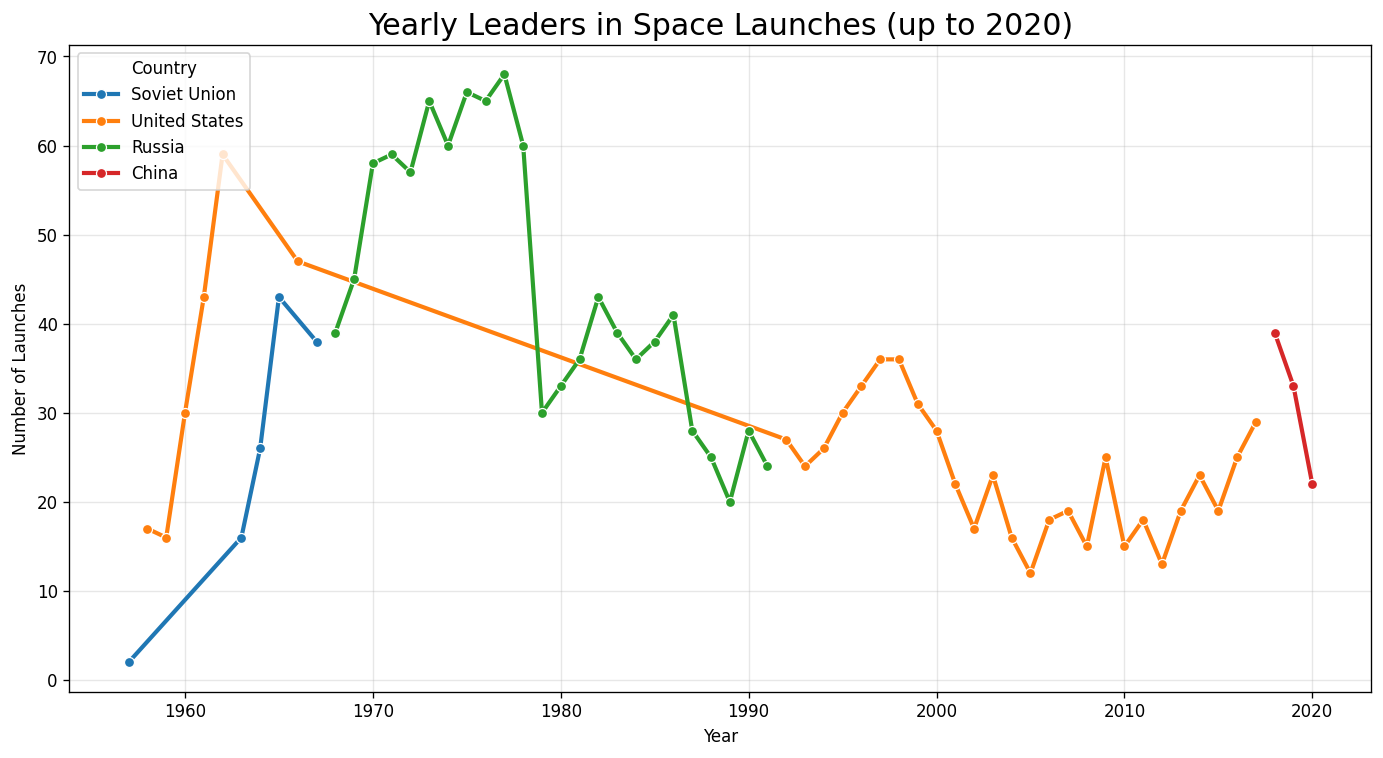

In [95]:
plt.figure(figsize=(14, 7), dpi=120)

sns.lineplot(
    data=leaders,
    x='year',
    y='Launch_Count',
    hue='Country',
    linewidth=2.5,
    marker='o'
)

plt.title('Yearly Leaders in Space Launches (up to 2020)', fontsize=18)
plt.xlabel('Year')
plt.ylabel('Number of Launches')
plt.legend(title='Country', loc='upper left')
plt.grid(True, alpha=0.3)
plt.show()

# Create a Year-on-Year Chart Showing the Organisation Doing the Most Number of Launches

Which organisation was dominant in the 1970s and 1980s? Which organisation was dominant in 2018, 2019 and 2020?

In [96]:
org_launches = (
    df_data.groupby(['year', 'Organisation'])
    .size()
    .reset_index(name='Launch_Count')
)

print(org_launches)

     year  Organisation  Launch_Count
0    1957     RVSN USSR             2
1    1957       US Navy             1
2    1958          AMBA             7
3    1958          NASA             2
4    1958     RVSN USSR             5
..    ...           ...           ...
627  2020     Roscosmos             4
628  2020        SpaceX            14
629  2020           ULA             4
630  2020        VKS RF             3
631  2020  Virgin Orbit             1

[632 rows x 3 columns]


In [98]:
top_org_per_year = (
    org_launches.loc[org_launches.groupby('year')['Launch_Count'].idxmax()]
    .sort_values('year')
)
print(top_org_per_year)

     year  Organisation  Launch_Count
0    1957     RVSN USSR             2
2    1958          AMBA             7
10   1959  US Air Force            10
15   1960  US Air Force            21
19   1961  US Air Force            23
..    ...           ...           ...
554  2016          CASC            22
580  2017        SpaceX            18
585  2018          CASC            37
601  2019          CASC            27
618  2020          CASC            19

[64 rows x 3 columns]


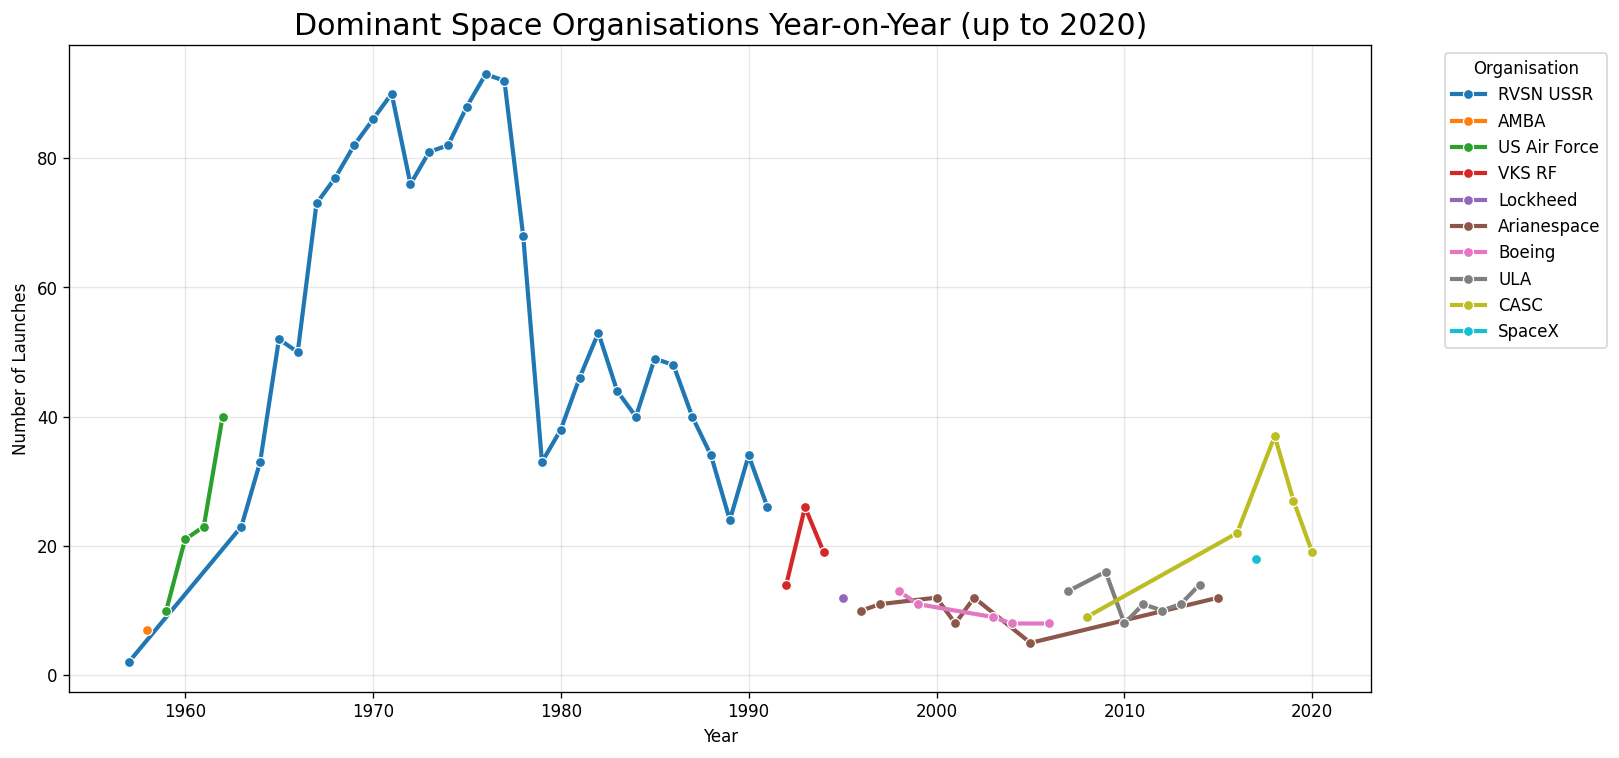

In [99]:
plt.figure(figsize=(14, 7), dpi=120)
sns.lineplot(
    data=top_org_per_year,
    x='year',
    y='Launch_Count',
    hue='Organisation',
    marker='o',
    linewidth=2.5
)

plt.title('Dominant Space Organisations Year-on-Year (up to 2020)', fontsize=18)
plt.xlabel('Year')
plt.ylabel('Number of Launches')
plt.legend(title='Organisation', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(alpha=0.3)
plt.show()